<center> <h2>Programming Assignment 1 Part 2 - Machine Learning TCSS 455 </h2>
<br>
<center>Author: Bhavesh Joshi<br>
Date : October 7th 2021
    <br>
    <hr>

## Import statements##

Let's import all the library that we will be using in this notebook

In [66]:
import numpy as np
import pandas as pd
import statistics
%matplotlib inline

<hr style="height:1px;border:none;color:#333;background-color:#333;">

## Question 1
Q1. Suppose that the values for a given set of data are grouped into intervals. The intervals and corresponding frequencies are as follows. (3 points)

Age  Frequency <br>
1-5      200 <br>
5-15     450 <br>
15-20   300 <br>
20-50   1500 <br>
50-80   700 <br>
80-110  44 <br>

Compute an approximate median value of age for the data

We have stored the given table in q1.csv file. So we will go ahead and read that csv file and store all contents into data object.

In [28]:
data = pd.read_csv("q1.csv")

Now as we have read the file, we will make sure what our data object contains. 

In [29]:
data

,Age,frequency
0,1-5,200
1,5-15,450
2,15-20,300
3,20-50,1500
4,50-80,700
5,80-110,44


Alright. First we will create data-frame object to find approximate median value.

In [68]:
df = pd.DataFrame(data)

In [69]:
df

,Age,frequency,Cumulative_Frequency
0,1-5,200,200
1,5-15,450,650
2,15-20,300,950
3,20-50,1500,2450
4,50-80,700,3150
5,80-110,44,3194


From the formula listed in this website, we need some additional details in order to compute the median value

https://www.aplustopper.com/calculate-median-grouped-frequency-distribution/

Now, let's create another column with cumlative frequency valyes

Median = ℓ + ((N/2–C)/f)×h

where,
ℓ = lower limit of median class interval<br>
C = cumulative frequency preceding to the median class frequency<br>
f = frequency of the class interval to which median belongs<br>
h = width of the class interval<br>
N =  f1 + f2 + f3 + … + fn.<br>

For that let's compute the commulative frequencies for our given data.

In [70]:
cumulative = []
N = 0

for i in df['frequency']:
    N += i
    cumulative.append(N)
    
cumulative

[200, 650, 950, 2450, 3150, 3194]

Let's add this new column of cumulative fequency into our data frame df

In [71]:
df['Cumulative_Frequency'] = cumulative

df

,Age,frequency,Cumulative_Frequency
0,1-5,200,200
1,5-15,450,650
2,15-20,300,950
3,20-50,1500,2450
4,50-80,700,3150
5,80-110,44,3194


As we can see less than cumulative frequency table added to our dataframe, so now we will go ahead apply our logic and use the formula to find median of grouped data.

In [72]:
index = 0
for e in cumulative:
    if (e > N/2):
        break
    else:
        index += 1

lets use the formula, before that let's create variables needed for formula and assign values to it and have a seperate function computing median value.

In [73]:
def findMedian():
    
    lower = int(str(df['Age'][index]).split('-')[0])
    upper = int(str(df['Age'][index]).split('-')[1])
    width = upper - lower
    f = df['frequency'][index]
    c = df['Cumulative_Frequency'][index-1]
    
    return lower + width*( (N/2 - c) / f)
    

Now our function is capable of finding median value using our logic. Let's call this function and assign it to a variable.

In [75]:
median = findMedian()

print('Median of the given data is: ' + str((median)))
print('So the approximate median of the given data is: ' + str(round(median)))

Median of the given data is: 32.94
So the approximate median of the given data is: 33.0


<hr style="height:1px;border:none;color:#333;background-color:#333;">

## Question 2

<br>
Q2. Suppose that the data for analysis includes the attribute age. 
The age values for the data tuples are (in increasing order) 
13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70. 

(please copy these values correctly in your input or the calculation will be wrong) (7 points)

Let's go ahead and save the data in list first.

In [76]:
order = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]

(a) What is the mean of the data? What is the median?

In [77]:
mean = statistics.mean(order)
median = statistics.median(order)

print('Using statistics library: Mean = ' + str(mean) + ' and Median is ' + str(median))

Using statistics library: Mean = 29.962962962962962 and Median is 25


There is another way to achieve the same thing, using pandas libray

In [78]:
df = pd.DataFrame(order)

print('Using pandas library: Mean = ' + str(df.mean()[0]) + ' and Median is ' + str(df.median()[0]))

Using pandas library: Mean = 29.962962962962962 and Median is 25.0


(b) What is the mode of the data? Comment on the data's modality (i.e., bimodal, trimodal, etc.).

Answer:

In [ ]:
statistics.multimode(order)

There are multiple mode available in given data: [25, 35]

As there are two modes in our data, data's modality is <i>bimodal</i>

(c) What is the midrange of the data?



In [80]:
max = 70
min = 13
midrange = max - min
print("The midrange of the given data is " + str(midrange))

The midrange of the given data is 57


(d) Can you find (roughly) the first quartile (Q1) and the third quartile (Q3) of the data?

In [81]:
df.describe()

,0
count,27.000000
mean,29.962963
std,12.942124
min,13.000000
25%,20.500000
50%,25.000000
75%,35.000000
max,70.000000


First Quartile (Q1) : 20.5
<br>
Third Quartile (Q3) : 35.0

(e) Give the five-number summary of the data.


In [82]:
# we know from the above results min, max, median
Q1 = 20
Q3 = 35

print("5-Number Summary")
print(str("Min") + " | " + str("Q1") + " | " + str("Median") + " | " + str("Q3") + " | " + str("Max") + " |")
print(str(min) + "  | " + str(Q1) + " | " + str(median) + "     | " + str(Q3) + " | " + str(max) + "  |")

5-Number Summary
Min | Q1 | Median | Q3 | Max |
13  | 20 | 25     | 35 | 70  |


(f)  Show a boxplot of the data.


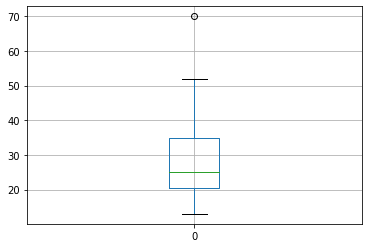

In [83]:
df.boxplot()

(g) How is a quantile-quantile plot different from a quantile plot?

QQ plot and quantile plots are same. Quantile plots directly display the quantiles of a set of values. The sample quantiles are plotted against the fraction of the sample they correspond to. Quantile-quantile plots allow us to compare the quantiles of two sets of numbers. The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set.

<hr style="height:1px;border:none;color:#333;background-color:#333;">

## Question 3

<br>
Q3. Using the data for age given in question 2, answer the following: (10 points)

(a) Use min-max normalization to transform the value 35 for age onto the range [0:0; 1:0]. (3 points)


In [84]:
v = 35
tranformed = (((v-min)/(max-min))*1+0)
print('The transform value of 35 using min-max normalization is '+str(round(tranformed, 4)))

The transform value of 35 using min-max normalization is 0.386


(b) Use z-score normalization to transform the value 35 for age, where the standard deviation of age is 12.94 years. (3 points)

In [85]:
sd = 12.94

ans = (v - mean)/sd
print('Z-score normalization to transform the value 35 is ' + str(round(ans,4)))

Z-score normalization to transform the value 35 is 0.3893


(c) Use normalization by decimal scaling to transform the value 35 for age. (3 points)

In [86]:
digits = int(len(str(max)))

ans = v/pow(10, digits)
print('Decimal scaling to transform the value 35 is ' + str(ans))

Decimal scaling to transform the value 35 is 0.35


(d) Comment on which method you would prefer to use for the given data, giving reasons as to why. (1 point)

In this <a href="https://www.researchgate.net/publication/354751895_Machine_Learning_to_Estimate_Surface_Roughness_from_Satellite_Images">article</a>, researchers conducted different analysis on differnt normalization techniques and based on results, Min-Max normalization outperforms all other normalization techniques. Based on results we have got, Min-Max and z-scores produces nearly same normalization value of 35. So, I would prefer to go with Min-Max or z-score.